#Setup

In [1]:
#Imports
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras
from keras.layers.convolutional import Conv2D
import matplotlib.pyplot as plt
import numpy as np
from keras import utils
from keras import layers
from keras import models
from keras import optimizers

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


In [0]:
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

#UNDERFIT

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(2, kernel_size=(20, 20), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Dropout(.9))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 2)         2402      
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 2)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 338)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3390      
Total params: 5,792
Trainable params: 5,792
Non-trainable params: 0
_________________________________________________________________


In [6]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))




Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 10s 207us/step - loss: 0.3255 - acc: 0.8999 - val_loss: 0.3250 - val_acc: 0.9000
Epoch 2/20
50000/50000 [==============================] - 7s 146us/step - loss: 0.3250 - acc: 0.9000 - val_loss: 0.3229 - val_acc: 0.9000
Epoch 3/20
50000/50000 [==============================] - 7s 147us/step - loss: 0.3236 - acc: 0.9001 - val_loss: 0.3213 - val_acc: 0.9002
Epoch 4/20
50000/50000 [==============================] - 7s 144us/step - loss: 0.3197 - acc: 0.8999 - val_loss: 0.3120 - val_acc: 0.9000
Epoch 5/20
50000/50000 [==============================] - 7s 146us/step - loss: 0.3150 - acc: 0.8994 - val_loss: 0.3083 - val_acc: 0.9001
Epoch 6/20
50000/50000 [==============================] - 7s 145us/step - loss: 0.3111 - acc: 0.8995 - val_loss: 0.3035 - val_acc: 0.8999
Epoch 7/20
50000/50000 [==============================] - 7s 144us/step - loss: 0.3086 - acc: 0.8994 - val_loss: 

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 70us/step
Test accuracy: 0.900059976387024


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

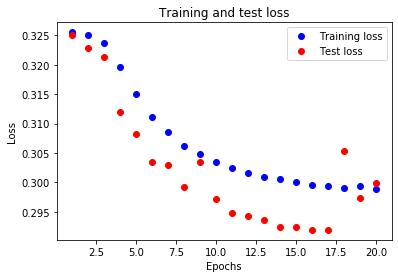

In [9]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

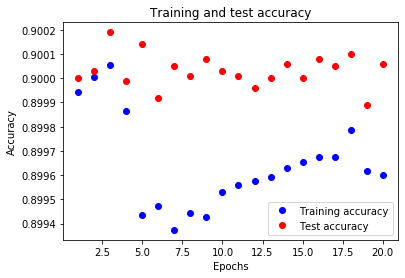

In [11]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Even though the printed accuracy values from each epoch show that there is a high test accuracy (roughly 90% for each epoch), the plot proves that the cnn cannot make sense of the training or test data.

#OVERFIT

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        4624      
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                346144    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 371,354
Trainable params: 371,354
Non-trainable params: 0
________________________________________________

In [13]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 212us/step - loss: 0.2561 - acc: 0.9060 - val_loss: 0.2345 - val_acc: 0.9114
Epoch 2/20
50000/50000 [==============================] - 10s 202us/step - loss: 0.2181 - acc: 0.9159 - val_loss: 0.2098 - val_acc: 0.9181
Epoch 3/20
50000/50000 [==============================] - 10s 200us/step - loss: 0.2024 - acc: 0.9216 - val_loss: 0.2046 - val_acc: 0.9207
Epoch 4/20
50000/50000 [==============================] - 10s 197us/step - loss: 0.1926 - acc: 0.9255 - val_loss: 0.1962 - val_acc: 0.9227
Epoch 5/20
50000/50000 [==============================] - 10s 199us/step - loss: 0.1850 - acc: 0.9281 - val_loss: 0.1910 - val_acc: 0.9251
Epoch 6/20
50000/50000 [==============================] - 10s 197us/step - loss: 0.1785 - acc: 0.9309 - val_loss: 0.1888 - val_acc: 0.9257
Epoch 7/20
50000/50000 [==============================] - 10s 198us/step - loss: 0.1721 - acc: 0.9336 - val_loss: 0.

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 79us/step
Test accuracy: 0.9340199964523316


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

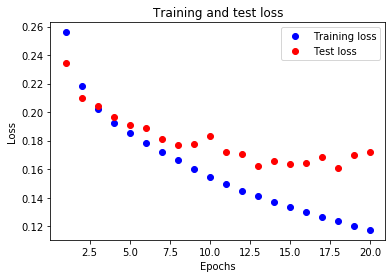

In [16]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

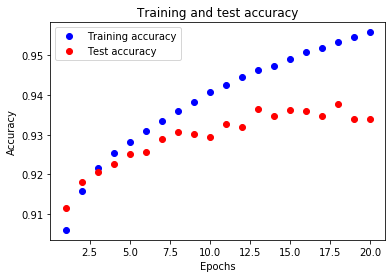

In [18]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#PRETTY GOOD MODEL

In [19]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
#model.add(layers.MaxPooling2D())
model.add(layers.Dropout(.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.5))
model.add(layers.Dense(10, activation='softmax'))

# compile the model

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)     

In [20]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 20s 410us/step - loss: 0.3692 - acc: 0.8804 - val_loss: 0.2574 - val_acc: 0.9032
Epoch 2/20
50000/50000 [==============================] - 19s 382us/step - loss: 0.2870 - acc: 0.8955 - val_loss: 0.2266 - val_acc: 0.9122
Epoch 3/20
50000/50000 [==============================] - 19s 379us/step - loss: 0.2484 - acc: 0.9061 - val_loss: 0.2207 - val_acc: 0.9142
Epoch 4/20
50000/50000 [==============================] - 19s 386us/step - loss: 0.2244 - acc: 0.9142 - val_loss: 0.1983 - val_acc: 0.9224
Epoch 5/20
50000/50000 [==============================] - 19s 379us/step - loss: 0.2078 - acc: 0.9202 - val_loss: 0.1808 - val_acc: 0.9284
Epoch 6/20
50000/50000 [==============================] - 19s 379us/step - loss: 0.1953 - acc: 0.9247 - val_loss: 0.1699 - val_acc: 0.9332
Epoch 7/20
50000/50000 [==============================] - 19s 380us/step - loss: 0.1850 - acc: 0.9289 - val_loss: 0.

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 109us/step
Test accuracy: 0.956909994316101


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

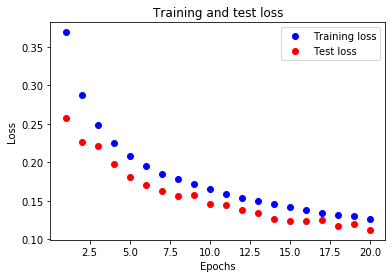

In [23]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

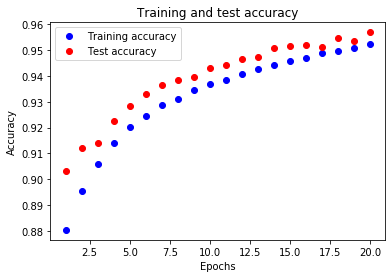

In [25]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()